In [2]:
import numpy as np
import pandas as pd 
import trackml.dataset 
from sklearn import preprocessing
import sys
sys.path.append('../utils')
sys.path.append('../dataloader/')
import json 
import matplotlib.pyplot as plt 
from dataloader import DataLoader 

from find_compatible_hits_dev import Find_Compatible_Hits_ModuleMap_Line_New
from tqdm import tqdm

unique_layer_id_mapping = pd.read_csv('/home/lhv14/unique_layer_id_mapping.csv') 
allowed_layer_connections = pd.read_csv('/home/lhv14/allowed_layer_connections.csv')

remap_modules_dic = ''
with open(r'/home/lhv14/remap_modules.txt','r') as f:
         for i in f.readlines():
            remap_modules_dic=i #string
remap_modules_dic = eval(remap_modules_dic) # this is orignal dict with instace dict


prefix = '/home/lhv14/exatrkx/Tracking-ML-Exa.TrkX/alldata/train_2/event00000' 


#cms stuff 

allowed_layer_connections_cms = pd.read_csv('/home/lhv14/allowed_layer_connections_cms.csv')
allowed_layer_connections_cms = allowed_layer_connections.rename(columns={'allowed_layer_id':'unique_layer_id'})

remap = {1:4, 2:0, 3:16, 5:28, 4:34, 6:39}

le = preprocessing.LabelEncoder()

def create_unique_label_background_tracks(x, y):
    x = -le.transform(y)
    return x

prefix_cms = '/home/lhv14/iterativegnn/graph_construction/gnnfiles/ntuple_PU200_numEvent1000/ntuple_PU200_event'
f =  open("/home/lhv14/mapping_CMS_nocut_1000.json")
mappings_cms = json.load(f)


ModuleNotFoundError: No module named 'utils'

In [149]:
mappings_cms

{'151': [151.0,
  152.0,
  153.0,
  154.0,
  155.0,
  156.0,
  161.0,
  162.0,
  163.0,
  164.0,
  165.0,
  167.0,
  169.0,
  5291.0,
  5292.0,
  5293.0,
  5294.0,
  5295.0,
  5296.0,
  52913.0,
  52914.0,
  5297.0,
  52916.0,
  52917.0,
  52918.0,
  52915.0,
  52912.0,
  5298.0,
  1610.0,
  1614.0,
  1616.0,
  1620.0,
  1621.0,
  1622.0,
  1623.0,
  1624.0,
  1628.0,
  1629.0,
  1630.0,
  1631.0,
  1632.0,
  1510.0,
  1514.0,
  1516.0,
  1517.0,
  1519.0,
  1520.0,
  1521.0,
  1522.0,
  1524.0,
  1525.0,
  1528.0,
  1529.0,
  1530.0,
  1531.0,
  1532.0],
 '152': [151.0,
  152.0,
  153.0,
  154.0,
  155.0,
  156.0,
  157.0,
  161.0,
  162.0,
  163.0,
  164.0,
  165.0,
  166.0,
  167.0,
  168.0,
  169.0,
  5291.0,
  5292.0,
  5293.0,
  5294.0,
  52910.0,
  5296.0,
  5295.0,
  5298.0,
  52915.0,
  5299.0,
  52917.0,
  52918.0,
  52912.0,
  52916.0,
  52913.0,
  52914.0,
  1610.0,
  1612.0,
  1613.0,
  1619.0,
  1620.0,
  1621.0,
  1622.0,
  1623.0,
  1624.0,
  1625.0,
  1627.0,
  1630.0,

In [177]:
!ls ../utils

find_compatible_hits_dev.py  geometry.py  noise.py     __pycache__
find_compatible_hits.py      hits.py	  plotting.py


In [17]:
dl = DataLoader() 
hits, allowed_pids = dl.load_data(0)

       run  lumi     evt      nhit     hit_n    hit_id          x          y  \
847    1.0  89.0  8805.0  136545.0  136545.0     835.0   1.944333   1.944754   
848    1.0  89.0  8805.0  136545.0  136545.0    5956.0   0.713012  -2.655959   
1830   1.0  89.0  8805.0  136545.0  136545.0    3520.0  -2.656618   0.710552   
1831   1.0  89.0  8805.0  136545.0  136545.0     947.0   1.943128   1.945959   
849    1.0  89.0  8805.0  136545.0  136545.0    2454.0  -0.713911   2.655718   
...    ...   ...     ...       ...       ...       ...        ...        ...   
78483  1.0  89.0  8805.0  136545.0  136545.0  121160.0  -3.448005 -24.997410   
77296  1.0  89.0  8805.0  136545.0  136545.0   64792.0  23.367802  -9.713054   
82121  1.0  89.0  8805.0  136545.0  136545.0   79127.0   3.331102  25.135843   
82122  1.0  89.0  8805.0  136545.0  136545.0   79503.0  -9.734730 -23.423878   
79605  1.0  89.0  8805.0  136545.0  136545.0  136330.0  -3.169660 -25.176525   

                z  particle_id  ...  vo

../dataloader/dataloader.py:117: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hits[['next_mod_id', 'connecting_layer_id']] = hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)


In [19]:
allowed_tracks = hits[hits['particle_id'].isin(allowed_pids)]

In [51]:
allowed_tracks.groupby(['particle_id', 'unique_layer_id'])['r'].min()

particle_id  unique_layer_id
-17938       1                   2.773636
             33                  3.767061
             34                  4.948933
             35                  6.404519
             36                  8.352824
                                  ...    
 908         13                 12.644710
 909         1                   3.250034
             33                  5.311006
             34                  8.412993
             35                 12.425887
Name: r, Length: 59959, dtype: float32

In [23]:
allowed_tracks[['prev_z', 'prev_r']] = allowed_tracks.groupby('particle_id')[['z', 'r']].shift(1)
allowed_tracks[['prev_prev_z', 'prev_prev_r']] = allowed_tracks.groupby('particle_id')[['prev_z', 'prev_r']].shift(1)
allowed_tracks['m'] = (allowed_tracks['prev_r'] - allowed_tracks['prev_prev_r'])/(allowed_tracks['prev_z'] - allowed_tracks['prev_prev_z'])
allowed_tracks['b'] = allowed_tracks['prev_r'] - allowed_tracks['m']*allowed_tracks['prev_z']
        m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
        b = hit2.r - m*hit2.z

allowed_tracks[['next_r', 'next_z', 'next_hit_id']] = allowed_tracks.groupby('particle_id')[['r', 'z', 'hit_id']].shift(-1)


/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
row = allowed_tracks[allowed_tracks['particle_id']==-1218].iloc[3]

In [103]:
p = allowed_tracks[allowed_tracks['particle_id']==-1218]

In [111]:
hit2 = p.iloc[5]
hit1 = p.iloc[4]
m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
b = hit2.r - m*hit2.z

m, b

(-0.4073908803258143, 0.3064166679320426)

In [112]:
p

,run,lumi,evt,nhit,hit_n,hit_id,x,y,z,particle_id,...,discrete_module_id,prev_z,prev_r,prev_prev_z,prev_prev_r,m,b,next_r,next_z,next_hit_id
6795,1,89,8805,136545,136545,5956,0.713012,-2.655959,-6.358441,-1218,...,214,NaN,NaN,NaN,NaN,NaN,NaN,2.750007,-6.382195,5957.0
6796,1,89,8805,136545,136545,5957,0.717706,-2.654701,-6.382195,-1218,...,214,-6.358441,2.750000,NaN,NaN,NaN,NaN,5.410768,-139.399994,57815.0
58280,1,89,8805,136545,136545,57815,3.417071,-4.195239,-139.399994,-1218,...,11228,-6.382195,2.750007,-6.358441,2.750000,-0.000281,2.748213,5.952309,-140.600006,56469.0
56941,1,89,8805,136545,136545,56469,3.635099,-4.713389,-140.600006,-1218,...,11218,-139.399994,5.410768,-6.382195,2.750007,-0.020003,2.622344,6.404061,-14.967553,12546.0
13327,1,89,8805,136545,136545,12546,2.659854,-5.825562,-14.967553,-1218,...,222,-140.600006,5.952309,-139.399994,5.410768,-0.451280,-57.497669,10.735623,-25.600000,26358.0
26991,1,89,8805,136545,136545,26358,6.355485,-8.652249,-25.600000,-1218,...,1521,-14.967553,6.404061,-140.600006,5.952309,0.003596,6.457882,11.112640,-110.056999,53221.0
53707,1,89,8805,136545,136545,53221,8.140172,7.564943,-110.056999,-1218,...,1113,-25.600000,10.735623,-14.967553,6.404061,-0.407391,0.306417,12.882145,-31.375999,31384.0
31978,1,89,8805,136545,136545,31384,8.737045,-9.466451,-31.375999,-1218,...,1628,-110.056999,11.112640,-25.600000,10.735623,-0.004464,10.621345,13.030678,-31.775999,31415.0
32009,1,89,8805,136545,136545,31415,8.914731,-9.504005,-31.775999,-1218,...,1629,-31.375999,12.882145,-110.056999,11.112640,0.022490,13.587779,15.995734,-40.699001,35921.0
36482,1,89,8805,136545,136545,35921,12.744699,-9.666240,-40.699001,-1218,...,1729,-31.775999,13.030678,-31.375999,12.882145,-0.371333,1.231215,18.965378,-174.800003,64076.0


In [42]:
def calc_distance(m, b, point_z, point_r): 
    d = np.abs(m*point_z - point_r +b )/np.sqrt(m**2+1)
    return d

In [65]:
class Find_Compatible_Hits_ModuleMap_Line:
    def __init__(self, hits): 
        self.hits = hits 
        self.done = False 
        self.prev_hit_buffer = hits.iloc[100]
        self.prev_prev_buffer = hits.iloc[0]

    def _find_m_b(self, hit1, hit2):
        m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
        b = hit2.r - m*hit2.z
        return m,b 

    def _find_module_compatible_hits(self, hit2, m): 
        
        self.hit = hit2 
        try: 
            #comp_mod = mappings[str(int(hit2.discrete_module_id))]
            comp_mod = mappings_cms[str(int(hit2.discrete_module_id))]
        except: 
            print("that comp mod issue ", "hit 2 is", hit2, "mod id hit2", hit2.discrete_module_id)
            
        if m > 0: 
            compy = self.hits[self.hits['z'] > hit2.z] 
        else: 
            compy = self.hits[self.hits['z'] < hit2.z]

        comp_hits = compy[(compy['discrete_module_id'].isin(comp_mod)) & 
                    (compy['r'] > hit2.r) & (compy['r'] != self.prev_hit_buffer.r)]# & 
                    #(np.abs(self.hits['z']) > np.abs(hit2.z))]
        #if hit2.unique_layer_id == self.prev_hit_buffer.unique_layer_id == self.prev_prev_buffer.unique_layer_id: 
        #if hit2.unique_layer_id == self.prev_hit_buffer.unique_layer_id: 
        #    comp_hits = comp_hits[comp_hits['unique_layer_id']!=hit2.unique_layer_id]

        if len(comp_hits) == 0: 
            if m > 0: 
                compy = self.hits[self.hits['z'] > hit2.z] 
            else: 
                compy = self.hits[self.hits['z'] < hit2.z]
            
            comp_hits = compy[(compy['discrete_module_id'].isin(comp_mod))]# & 
                    #(compy['r'] > hit2.r) & (compy['r'] != self.prev_hit_buffer.r)]# & 

            if len(comp_hits) ==0 : 
            # TODO: fix this 
                #comp_hits = pd.concat([hit2_df])
                hit2_df = pd.DataFrame([hit2])

                comp_hits = hit2_df
            #print("usin hit 2 as comp")
                self.done = True 

        return comp_hits 
    
    def _find_line_compatible_hits(self, m,b, comp_hits, num_close):
        distances = calc_distance(m,b, comp_hits.z, comp_hits.r)

        if num_close == 0: 
            idx = np.argmin(distances)
            one_hit = pd.DataFrame([comp_hits.iloc[idx]]) 
            final = pd.concat([one_hit, one_hit])
            #print(final)
        elif len(comp_hits) > num_close: 
            idx = np.argpartition(distances, num_close)
            final = comp_hits.iloc[idx][:num_close]

        else: 
            final = comp_hits 
        
        #print(final)
                              #prepare file to write output 

        return final 
    
    def hit_df(self, hit): 
        hit_df = self.hits[(self.hits['z'] == hit[0]) & (self.hits['r'] == hit[1])]
        if hit_df.shape[0] != 1: 
            hit_df = hit_df.iloc[0] 
        return hit_df.squeeze() 

    def get_comp_hits(self, hit2, m, b, num_close): 
        #the state only includes the positions of the hits, get the full row 
        self.prev_hit_buffer = hit2 
        mod_comp_hits = self._find_module_compatible_hits(hit2, m) 
        comp_hits = self._find_line_compatible_hits(m, b, mod_comp_hits, num_close)
        self.prev_prev_buffer = hit2 
        return comp_hits, self.done 


        


In [66]:
comp = Find_Compatible_Hits_ModuleMap_Line(hits) 

row = p.iloc[2] 
comp_hits, done = comp.get_comp_hits(row, row['m'], row['b'], 10) 
next_hit = p.iloc[3]
comp_hits['isRight'] = (comp_hits['z'] == next_hit['z']) & (comp_hits['r'] == next_hit['r'])
comp_hits['isRight'] = comp_hits['isRight'].astype(int)

In [62]:
tmp = comp_hits.join(pd.DataFrame([row]),  rsuffix='_2')

In [132]:
hit_r = [] 
hit_z = []
m = []
b = []
suggested_hit_z = np.array([])
suggested_hit_r = np.array([])
isRight = np.array([]) 
hitsfound = 0 
tries = 0 

#for pid in tqdm(np.unique(allowed_tracks.particle_id)[:5]): 
for pid in np.array([-17938., -17935., -17934., -17929., -17924.]):
    p = allowed_tracks[allowed_tracks['particle_id']==pid]
    for i in range(len(p.dropna())): 


        row = p.iloc[i] 
        #comp_hits, done = comp.get_comp_hits(row, row['m'], row['b'], 10) 
        comp_hits = find_module_compatible_hits_test(row, row['m'], row['b'])
        print("hit is ", row[['z', 'r']], "final is ", comp_hits, "and hit found is", row.next_hit_id in comp_hits.hit_id.values)

        if row.next_hit_id in comp_hits.hit_id.values: 
            hitsfound += 1 
        tries += 1 
        #comp_hits['isRight'] = (comp_hits['z'] == row['next_z']) & (comp_hits['r'] == row['next_r'])
        #comp_hits['isRight'] = comp_hits['hit_id'] == row['next_hit_id']
        #comp_hits['isRight'] = comp_hits['isRight'].astype(int)
        #print(comp_hits)

#         hit_r = np.append(hit_r, np.repeat(row.r, len(comp_hits)))
#         hit_z = np.append(hit_z, np.repeat(row.z, len(comp_hits)))
#         m = np.append(m, np.repeat(row.m, len(comp_hits)))
#         b = np.append(b, np.repeat(row.b, len(comp_hits)))
#         suggested_hit_z = np.append(suggested_hit_z, comp_hits.z.values) 
#         suggested_hit_r = np.append(suggested_hit_r, comp_hits.r.values)
        #isRight = np.append(isRight, comp_hits.isRight.values)

hit is  z    19.387152
r     2.773636
Name: 4735, dtype: float64 final is        run  lumi   evt    nhit   hit_n  hit_id         x         y          z  \
1668    1    89  8805  136545  136545     750  1.945139  1.943948  -8.818335   
1751    1    89  8805  136545  136545     835  1.944333  1.944754  -2.842576   
8226    1    89  8805  136545  136545    7397  2.656227 -0.712008  -0.715824   
5657    1    89  8805  136545  136545    4804 -1.943937 -1.945150   0.912315   
2048    1    89  8805  136545  136545    1135  1.944278  1.944809  10.710626   
6795    1    89  8805  136545  136545    5956  0.713012 -2.655959  -6.358441   
4401    1    89  8805  136545  136545    3520 -2.656618  0.710552   1.252145   
5899    1    89  8805  136545  136545    5050 -1.945431 -1.943657   8.998556   
1860    1    89  8805  136545  136545     947  1.943128  1.945959  -0.930294   
5522    1    89  8805  136545  136545    4665 -1.946225 -1.942862  -4.617783   

      particle_id  ...  sim_dxy_sig    sim_p

hit is  z   -10.591250
r    10.242478
Name: 15833, dtype: float64 final is         run  lumi   evt    nhit   hit_n  hit_id          x          y  \
15825    1    89  8805  136545  136545   15070  -2.153414   9.986077   
15827    1    89  8805  136545  136545   15072  -2.160821   9.984903   
16449    1    89  8805  136545  136545   15700  -7.656735   6.768243   
18958    1    89  8805  136545  136545   18240   7.673007  -6.751972   
15826    1    89  8805  136545  136545   15071  -2.158352   9.985294   
17817    1    89  8805  136545  136545   17087  -4.103018  -9.357136   
550      1    89  8805  136545  136545   16054 -10.162374   1.040319   
15890    1    89  8805  136545  136545   15136  -0.997587  10.169142   
17297    1    89  8805  136545  136545   16560  -8.827740  -5.142016   
17286    1    89  8805  136545  136545   16549  -9.350054  -4.116915   

               z  particle_id  ...  sim_dxy_sig    sim_pt   sim_eta   sim_phi  \
15825  -8.858695       -17935  ...     0.116406  7

hit is  z    109.257004
r      8.301970
Name: 109752, dtype: float64 final is          run  lumi   evt    nhit   hit_n  hit_id          x          y  \
110073    1    89  8805  136545  136545  109976  -2.067424  10.982368   
116493    1    89  8805  136545  136545  116420   3.773522 -13.968307   
116513    1    89  8805  136545  136545  116440   5.720503 -13.283538   
115795    1    89  8805  136545  136545  115718  13.672070   4.715594   
109820    1    89  8805  136545  136545  109722  11.156295   0.746324   
116375    1    89  8805  136545  136545  116302  -8.187151 -11.920260   
110769    1    89  8805  136545  136545  110673  10.450808  -3.979795   
116343    1    89  8805  136545  136545  116270 -10.041837 -10.403124   
109857    1    89  8805  136545  136545  109759  10.370291   4.304986   
110525    1    89  8805  136545  136545  110429  -4.639214 -10.177668   

                 z  particle_id  ...  sim_dxy_sig    sim_pt   sim_eta  \
110073  109.656998         -105  ...        

hit is  z   -31.775999
r     5.268386
Name: 29760, dtype: float64 final is         run  lumi   evt    nhit   hit_n  hit_id         x         y          z  \
34794    1    89  8805  136545  136545   34217  4.109303 -5.355958 -40.299000   
27918    1    89  8805  136545  136545   27292  1.959222  5.048408 -32.576000   
32911    1    89  8805  136545  136545   32324 -6.818443 -1.020453 -41.098999   
28240    1    89  8805  136545  136545   27622 -3.771641  3.875939 -32.576000   
33866    1    89  8805  136545  136545   33284  3.415372  5.819597 -40.299000   
28751    1    89  8805  136545  136545   28136 -3.021657 -4.495834 -32.576000   
28544    1    89  8805  136545  136545   27928 -4.469773 -3.042048 -32.576000   
34359    1    89  8805  136545  136545   33781 -6.742193 -0.994389 -40.699001   
33464    1    89  8805  136545  136545   32878  4.571092 -5.256886 -41.499001   
34181    1    89  8805  136545  136545   33602 -5.356017  4.235481 -40.699001   

       particle_id  ...  sim_dxy

In [131]:
hitsfound/tries

0.21951219512195122

In [114]:
sum(isRight)/len(isRight/10)

ZeroDivisionError: division by zero

In [115]:
len(isRight/10)

0

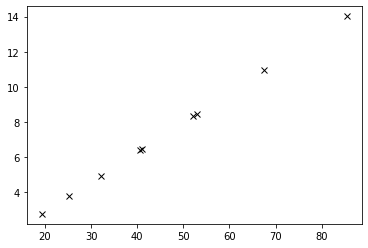

In [136]:
p = hits[hits['particle_id']==-17938.]
plt.plot(p.z, p.r, "kx")

In [137]:
p

,run,lumi,evt,nhit,hit_n,hit_id,x,y,z,particle_id,...,sim_dxy_sig,sim_pt,sim_eta,sim_phi,volume_id,layer_id,module_id,r,unique_layer_id,discrete_module_id
4735,1,89,8805,136545,136545,3869,-2.749814,0.362738,19.387152,-17938,...,0.0,11.864284,2.469641,3.00885,2,1,9,2.773636,1,219
80850,1,89,8805,136545,136545,80456,-3.734851,0.491561,25.200001,-17938,...,0.0,11.864284,2.469641,3.00885,3,17,10,3.767061,33,31710
84872,1,89,8805,136545,136545,84534,-4.907141,0.641798,32.175999,-17938,...,0.0,11.864284,2.469641,3.00885,3,18,10,4.948933,34,31810
90534,1,89,8805,136545,136545,90269,-6.350805,0.827724,40.699001,-17938,...,0.0,11.864284,2.469641,3.00885,3,19,16,6.404519,35,31916
89104,1,89,8805,136545,136545,88819,-6.417197,0.835406,41.098999,-17938,...,0.0,11.864284,2.469641,3.00885,3,19,10,6.471346,35,31910
94998,1,89,8805,136545,136545,94784,-8.283895,1.070870,52.111000,-17938,...,0.0,11.864284,2.469641,3.00885,3,20,16,8.352824,36,32016
96180,1,89,8805,136545,136545,95980,-8.415209,1.087709,52.910999,-17938,...,0.0,11.864284,2.469641,3.00885,3,20,12,8.485214,36,32012
100859,1,89,8805,136545,136545,100701,-10.884128,1.393838,67.508003,-17938,...,0.0,11.864284,2.469641,3.00885,3,21,12,10.973013,37,32112
106465,1,89,8805,136545,136545,106353,-13.906260,1.759048,85.377998,-17938,...,0.0,11.864284,2.469641,3.00885,3,22,16,14.017072,38,32216


In [122]:
def find_module_compatible_hits_test(hit2, m, b): 

        try: 
            comp_mod = mappings_cms[str(int(hit2.discrete_module_id))]
            #print("hit2 mod id", hit2.discrete_module_id)
        except: 
            #print("haven't seen this module", hit2.discrete_module_id)
            comp_mod = []
            
        
    
        if m > 0: 
            compy = hits[((hits['z'] > hit2.z))] #|  (hits['z'] == hit2.z))]
        else: 
            compy = hits[((hits['z'] < hit2.z))] #|  (hits['z'] == hit2.z))] 
        
        #comp_hits = compy[compy['discrete_module_id'].isin(comp_mod) & 
        #            (compy['r'] > hit2.r)]# & 
                    #(np.abs(hits['z']) > np.abs(hit2.z))]
            
        comp_hits = compy[compy['discrete_module_id'].isin(comp_mod)]
        #print("is in comp hits", hit3.hit_id in comp_hits.hit_id)
        #num_comp.append(len(comp_hits))
        
        distances = calc_distance(m,b, comp_hits.z, comp_hits.r)
        num_close = 10

        if len(comp_hits) > num_close: 
            idx = np.argpartition(distances, range(num_close))
            final = comp_hits.iloc[idx.values][:num_close]
        else: 
            final = comp_hits 
        
        
 
        return final 

In [52]:
hits = pd.read_hdf(prefix_cms+str(0)+'.h5')


In [55]:
hits = hits.sort_values(['r', 'z'])
hits['unique_layer_id'] = [remap[y] + x for x,y in hits[['layer_id', 'volume_id']].values]
hits['discrete_module_id'] = [int(str(row[0]) + str(row[1]) + str(row[2])) for row in hits[['volume_id', 'layer_id','module_id']].values] 

hits[['next_mod_id', 'connecting_layer_id']] = hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)
hits = hits.dropna()

# remove tracks that have missing hits 
allowed_hits = hits.merge(allowed_layer_connections_cms, on=['unique_layer_id', 'connecting_layer_id'], how='outer', indicator=True)
forbidden_pids = np.unique(allowed_hits[allowed_hits['_merge']=='left_only'].particle_id)
hits = hits[~hits.isin(forbidden_pids)]



/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [59]:
len(hits.particle_id.value_counts())

4201

In [62]:
hits[hits['particle_id'].isna()]

,run,lumi,evt,nhit,hit_n,hit_id,x,y,z,particle_id,...,sim_eta,sim_phi,volume_id,layer_id,module_id,r,unique_layer_id,discrete_module_id,next_mod_id,connecting_layer_id
1668,1,89,8805,136545,136545,750.0,1.945139,1.943948,-8.818335,NaN,...,-1.993133,0.768413,2,1,3,2.750000,1,213,153.0,9.0
2048,1,89,8805,136545,136545,1135.0,1.944278,1.944809,10.710626,NaN,...,1.840821,0.819509,2,1,7,2.750000,1,217,3174.0,33.0
6795,1,89,8805,136545,136545,5956.0,0.713012,-2.655959,-6.358441,NaN,...,-1.526444,-1.428524,2,1,4,2.750000,1,214,214.0,1.0
4401,1,89,8805,136545,136545,3520.0,-2.656618,0.710552,1.252145,NaN,...,0.334611,2.907742,2,1,5,2.750000,1,215,226.0,2.0
5899,1,89,8805,136545,136545,5050.0,-1.945431,-1.943657,8.998556,NaN,...,1.867526,-2.345403,2,1,7,2.750000,1,217,31713.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65244,1,89,8805,136545,136545,64792.0,23.367802,-9.713054,-174.399994,NaN,...,-2.624437,-0.316705,1,13,46,25.306078,17,11346,11345.0,17.0
79538,1,89,8805,136545,136545,79127.0,3.331102,25.135843,-264.399994,NaN,...,-3.017693,1.935381,1,16,12,25.355608,20,11612,11611.0,20.0
79914,1,89,8805,136545,136545,79503.0,-9.734730,-23.423878,-264.399994,NaN,...,-2.941274,-1.460725,1,16,34,25.366179,20,11634,11633.0,20.0
136330,1,89,8805,136545,136545,136330.0,-3.169660,-25.176525,265.200012,NaN,...,3.019034,-2.074890,3,28,36,25.375267,44,32836,32836.0,44.0


In [14]:
dl = DataLoader() 
hits, allowed_pids = dl.load_data(0)

len 1  136545
len 2  136545
len 3 136545


/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:87: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [15]:
len(np.unique(allowed_pids))

334

In [17]:
allowed_pids

array([   nan, -3029.,    nan, ...,    nan,    nan,    nan])

In [1]:
quality = pd.read_csv('../evaluation/comp_hits_qualities.csv')


NameError: name 'pd' is not defined